<a href="https://colab.research.google.com/github/Prasad-Khedkar/Mobile_price_range-Classification-/blob/main/Mobile_price_range_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import cross_val_score , cross_validate

from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
pd.set_option('display.max_columns',500)

from sklearn.model_selection import GridSearchCV

import warnings
warnings. simplefilter(action='ignore', category=FutureWarning)

In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [3]:
path = '/content/drive/MyDrive/Projects/Mobile_price_range(Classification)/Data/'

In [4]:
dff = pd.read_csv(path + 'data_mobile_price_range.csv')

In [5]:
df = dff.copy()

In [6]:
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1


In [7]:
df.tail()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
1995,794,1,0.5,1,0,1,2,0.8,106,6,14,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,3,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,3,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,5,336,670,869,18,10,19,1,1,1,0
1999,510,1,2.0,1,5,1,45,0.9,168,6,16,483,754,3919,19,4,2,1,1,1,3


In [8]:
df.shape

(2000, 21)

In [9]:
df.info()       ## To see dtypes of diff. variables

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

# Data Cleaning

In [10]:
df.isnull().sum()           ## Checking for null values

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [11]:
df.drop_duplicates(keep='first',inplace=True)    ## Dropping duplicate values if any:

In [12]:
df.shape

(2000, 21)

# *Insight 1*: Neither any duplicates nor any null values present in the dataset

In [13]:
df.describe().T                                    ## Describing Numerical Attributes

,count,mean,std,min,25%,50%,75%,max
battery_power,2000.0,1238.51850,439.418206,501.0,851.75,1226.0,1615.25,1998.0
blue,2000.0,0.49500,0.500100,0.0,0.00,0.0,1.00,1.0
clock_speed,2000.0,1.52225,0.816004,0.5,0.70,1.5,2.20,3.0
dual_sim,2000.0,0.50950,0.500035,0.0,0.00,1.0,1.00,1.0
fc,2000.0,4.30950,4.341444,0.0,1.00,3.0,7.00,19.0
four_g,2000.0,0.52150,0.499662,0.0,0.00,1.0,1.00,1.0
int_memory,2000.0,32.04650,18.145715,2.0,16.00,32.0,48.00,64.0
m_dep,2000.0,0.50175,0.288416,0.1,0.20,0.5,0.80,1.0
mobile_wt,2000.0,140.24900,35.399655,80.0,109.00,141.0,170.00,200.0
n_cores,2000.0,4.52050,2.287837,1.0,3.00,4.0,7.00,8.0


In [14]:
pd.DataFrame(df.columns).rename({0:'column_name'},axis=1)      ## Column Names

,column_name
0,battery_power
1,blue
2,clock_speed
3,dual_sim
4,fc
5,four_g
6,int_memory
7,m_dep
8,mobile_wt
9,n_cores


In [15]:
len(df.columns)           ## Total no. of columns

21

In [16]:
df.nunique()             ## unique values in each column

battery_power    1094
blue                2
clock_speed        26
dual_sim            2
fc                 20
four_g              2
int_memory         63
m_dep              10
mobile_wt         121
n_cores             8
pc                 21
px_height        1137
px_width         1109
ram              1562
sc_h               15
sc_w               19
talk_time          19
three_g             2
touch_screen        2
wifi                2
price_range         4
dtype: int64

# *Insight*: As from above output- features like-  blue,dual_sim,four_g,n_cores,three_g,touch_screen,wifi,price_range(target var.) are categorical in nature

# *Exploratory Data Analysis* 
## Univariate Analysis :

## Bluetooth

In [17]:
df['blue'].value_counts()

0    1010
1     990
Name: blue, dtype: int64

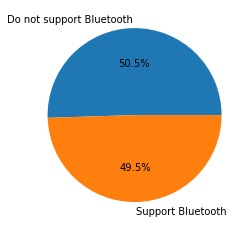

In [18]:
plt.pie(df['blue'].value_counts(),labels = ['Do not support Bluetooth','Support Bluetooth'] ,autopct = '%0.1f%%')
plt.show()

## Dual Sim

In [19]:
df['dual_sim'].value_counts()

1    1019
0     981
Name: dual_sim, dtype: int64

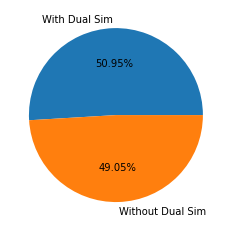

In [20]:
plt.pie(df['dual_sim'].value_counts(), labels = ['With Dual Sim','Without Dual Sim'], autopct = '%0.2f%%')
plt.show()

## 4G

In [21]:
df['four_g'].value_counts()

1    1043
0     957
Name: four_g, dtype: int64

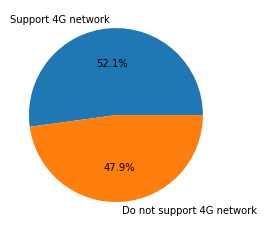

In [22]:
plt.pie(df['four_g'].value_counts(),labels = ['Support 4G network','Do not support 4G network'], autopct = '%0.1f%%')
plt.show()

## No. of Cores

In [23]:
df['n_cores'].value_counts().to_frame()

,n_cores
4,274
7,259
8,256
2,247
3,246
5,246
1,242
6,230


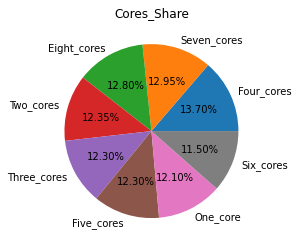

In [24]:
cores_present = ['Four_cores','Seven_cores','Eight_cores','Two_cores','Three_cores','Five_cores','One_core','Six_cores']
plt.pie(df['n_cores'].value_counts(),autopct='%.2f%%',labels=cores_present)
plt.title('Cores_Share')
plt.show()

## 3G

In [25]:
df['three_g'].value_counts()

1    1523
0     477
Name: three_g, dtype: int64

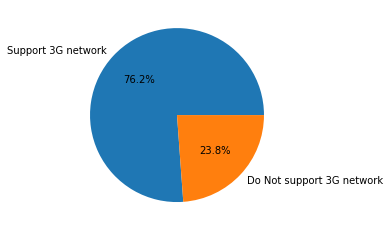

In [26]:
plt.pie(df['three_g'].value_counts(), labels = ['Support 3G network','Do Not support 3G network'], autopct = '%0.1f%%')
plt.show()

## Touch Screen

In [27]:
df['touch_screen'].value_counts()

1    1006
0     994
Name: touch_screen, dtype: int64

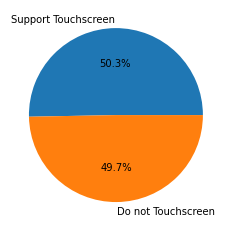

In [28]:
plt.pie(df['touch_screen'].value_counts(), labels = ['Support Touchscreen','Do not Touchscreen'], autopct= '%0.1f%%')
plt.show()

## Price Range (*Target Variable*)

In [29]:
df['price_range'].value_counts()

1    500
2    500
3    500
0    500
Name: price_range, dtype: int64

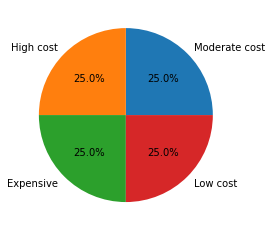

In [30]:
plt.pie(df['price_range'].value_counts(), labels = ['Moderate cost','High cost','Expensive','Low cost'] , autopct = '%0.1f%%')
plt.show()

# Multi-variate/Bi-variate Analysis - 

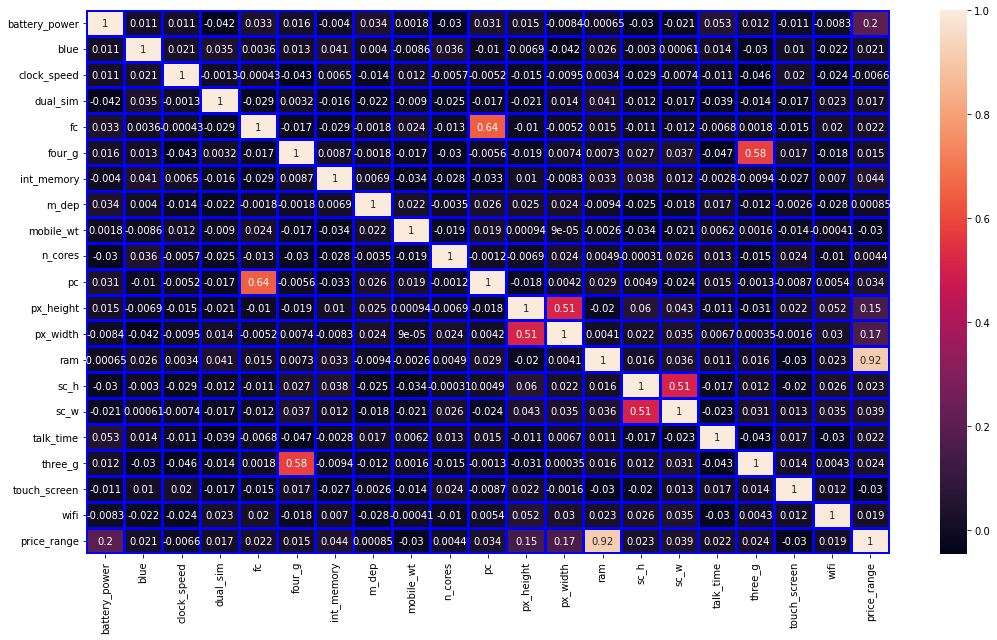

In [31]:
plt.figure(figsize=(18,10))
sns.heatmap(df.corr(), annot = True, linewidth = 2, linecolor = 'blue')

# *Insight* : From the heatmap, there is high correlation between 'ram' & 'price_range'

## RAM vs Price

In [32]:
max(df['ram'])

3998

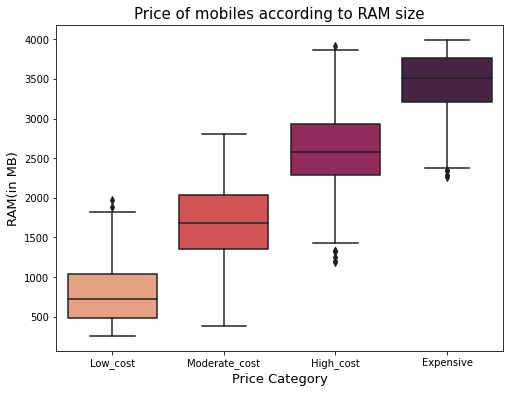

In [33]:
plt.figure(figsize=(8,6))
sns.boxplot(x= df['price_range'], y =df['ram'], palette = 'rocket_r')
plt.xticks(ticks=[0,1,2,3], labels = ['Low_cost','Moderate_cost','High_cost','Expensive'])
plt.xlabel('Price Category',fontsize=13)
plt.ylabel('RAM(in MB)',fontsize=13)
plt.title('Price of mobiles according to RAM size', fontsize = 15)
plt.show()

# *Insight*: Mobiles having higher RAM are costlier

## Camera(rear) vs Price

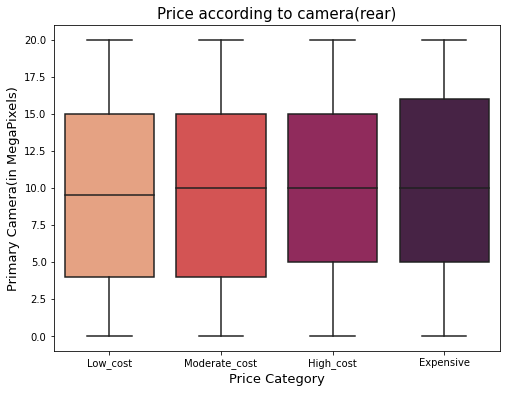

In [34]:
plt.figure(figsize=(8,6))
sns.boxplot(x= df['price_range'], y =df['pc'], palette = 'rocket_r')
plt.xticks(ticks=[0,1,2,3], labels = ['Low_cost','Moderate_cost','High_cost','Expensive'])
plt.xlabel('Price Category',fontsize=13)
plt.ylabel('Primary Camera(in MegaPixels)',fontsize=13)
plt.title('Price according to camera(rear)', fontsize=15)
plt.show()

### No conclusion

## Camera(front) vs Price

Text(0.5, 0, 'Price Category')

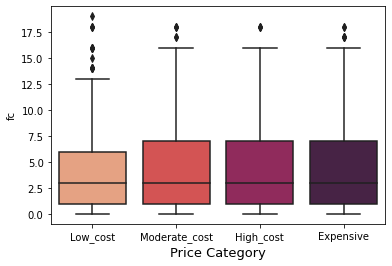

In [35]:
sns.boxplot(x= df['price_range'], y =df['fc'], palette = 'rocket_r')
plt.xticks(ticks=[0,1,2,3], labels = ['Low_cost','Moderate_cost','High_cost','Expensive'])
plt.xlabel('Price Category',fontsize=13)

### No conclusion

## Mobile weight vs Price

Text(0.5, 0, 'Price Category')

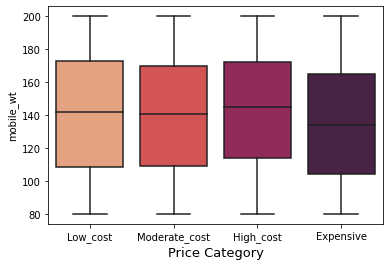

In [36]:
sns.boxplot(x= df['price_range'], y =df['mobile_wt'], palette = 'rocket_r')
plt.xticks(ticks=[0,1,2,3], labels = ['Low_cost','Moderate_cost','High_cost','Expensive'])
plt.xlabel('Price Category',fontsize=13)

# *Insight*: Lighter Mobiles are expensive

## No. of cores vs Price

Text(0.5, 0, 'Price Category')

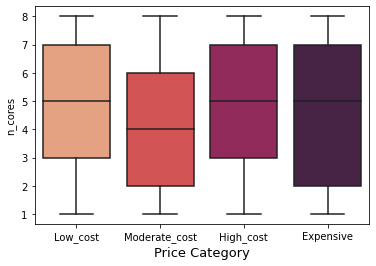

In [37]:
sns.boxplot(x= df['price_range'], y =df['n_cores'], palette = 'rocket_r')
plt.xticks(ticks=[0,1,2,3], labels = ['Low_cost','Moderate_cost','High_cost','Expensive'])
plt.xlabel('Price Category',fontsize=13)

# *Insight*: Moderate cost mobiles have less no. of cores 

## Talk time vs Price

Text(0.5, 0, 'Price Category')

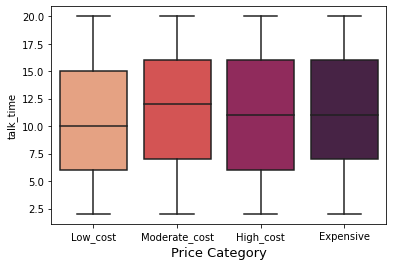

In [38]:
sns.boxplot(x= df['price_range'], y =df['talk_time'], palette = 'rocket_r')
plt.xticks(ticks=[0,1,2,3], labels = ['Low_cost','Moderate_cost','High_cost','Expensive'])
plt.xlabel('Price Category',fontsize=13)

### No conclusion

## Thickness of mobile vs Price

Text(0.5, 0, 'Price Category')

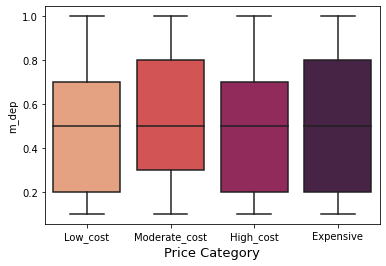

In [39]:
sns.boxplot(x= df['price_range'], y =df['m_dep'], palette = 'rocket_r')
plt.xticks(ticks=[0,1,2,3], labels = ['Low_cost','Moderate_cost','High_cost','Expensive'])
plt.xlabel('Price Category',fontsize=13)

### No conclusion

## Battery cap. vs Price

Text(0.5, 0, 'Price Category')

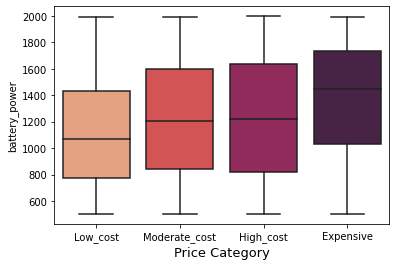

In [40]:
sns.boxplot(x= df['price_range'], y =df['battery_power'], palette = 'rocket_r')
plt.xticks(ticks=[0,1,2,3], labels = ['Low_cost','Moderate_cost','High_cost','Expensive'])
plt.xlabel('Price Category',fontsize=13)

# *Insight*: Mobiles having higher battery capacity are expensive.

## Storage cap. vs Price

Text(0.5, 0, 'Price Category')

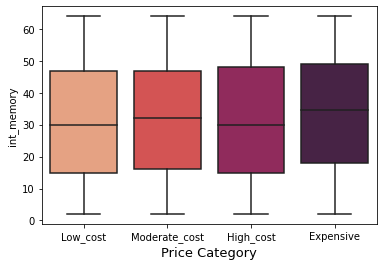

In [41]:
sns.boxplot(x= df['price_range'], y =df['int_memory'], palette = 'rocket_r')
plt.xticks(ticks=[0,1,2,3], labels = ['Low_cost','Moderate_cost','High_cost','Expensive'])
plt.xlabel('Price Category',fontsize=13)

# *Insight*: Mobiles having higher storage are slightly expensive

### Creating new columns 'pixel_area' and 'screen_area'

Text(0.5, 0, 'Price Category')

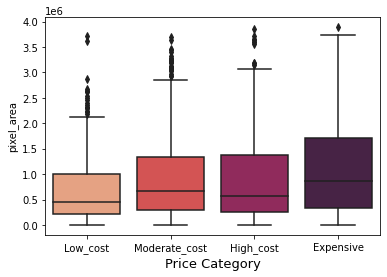

In [42]:
df['pixel_area'] = df['px_height']*df['px_width']
sns.boxplot(x= df['price_range'], y =df['pixel_area'], palette = 'rocket_r')
plt.xticks(ticks=[0,1,2,3], labels = ['Low_cost','Moderate_cost','High_cost','Expensive'])
plt.xlabel('Price Category',fontsize=13)

# *Insight*: Mobiles having larger pixel area(Actual display) are expensive

Text(0.5, 0, 'Price Category')

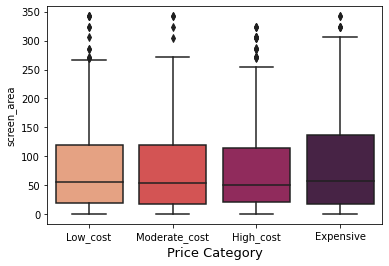

In [43]:
df['screen_area'] = df['sc_h'] * df['sc_w']
sns.boxplot(x= df['price_range'], y =df['screen_area'], palette = 'rocket_r')
plt.xticks(ticks=[0,1,2,3], labels = ['Low_cost','Moderate_cost','High_cost','Expensive'])
plt.xlabel('Price Category',fontsize=13)

# *Insight:* Mobiles having bigger screen(Total display) are expensive

# Data Preparation

### Defining feature and label

In [44]:
X = df.drop(['price_range'],axis=1)              ## creating feature set

In [45]:
y = df['price_range']                            ## creating label set

### Dividing feature set into categorical and numerical

In [46]:
num = X.drop(['blue','dual_sim','four_g','n_cores','three_g','touch_screen','wifi'], axis = 1)
cat = X.filter(['blue','dual_sim','four_g','n_cores','three_g','touch_screen','wifi'])

In [47]:
num.head()

,battery_power,clock_speed,fc,int_memory,m_dep,mobile_wt,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,pixel_area,screen_area
0,842,2.2,1,7,0.6,188,2,20,756,2549,9,7,19,15120,63
1,1021,0.5,0,53,0.7,136,6,905,1988,2631,17,3,7,1799140,51
2,563,0.5,2,41,0.9,145,6,1263,1716,2603,11,2,9,2167308,22
3,615,2.5,0,10,0.8,131,9,1216,1786,2769,16,8,11,2171776,128
4,1821,1.2,13,44,0.6,141,14,1208,1212,1411,8,2,15,1464096,16


In [48]:
cat.head()

,blue,dual_sim,four_g,n_cores,three_g,touch_screen,wifi
0,0,0,0,2,0,0,1
1,1,1,1,3,1,1,0
2,1,1,1,5,1,1,0
3,1,0,0,6,1,0,0
4,1,0,1,2,1,1,0


### Converting categorical data to numbers and concating it

In [49]:
## using pandas get_dummies method to convert categorical to numerical
cat_num = pd.concat([pd.get_dummies(cat['blue'],prefix='blue'), pd.get_dummies(cat['dual_sim'],prefix='dual_sim'),pd.get_dummies(cat['four_g'],'four_g'), pd.get_dummies(cat['n_cores'],prefix='core'), pd.get_dummies(cat['three_g'],prefix='three_g'),pd.get_dummies(cat['touch_screen'],prefix='touch_screen'),pd.get_dummies(cat['wifi'],prefix='wifi')], axis=1)

In [50]:
cat_num.head()

,blue_0,blue_1,dual_sim_0,dual_sim_1,four_g_0,four_g_1,core_1,core_2,core_3,core_4,core_5,core_6,core_7,core_8,three_g_0,three_g_1,touch_screen_0,touch_screen_1,wifi_0,wifi_1
0,1,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0,1,0,0,1
1,0,1,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0,1,1,0
2,0,1,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,1,1,0
3,0,1,1,0,1,0,0,0,0,0,0,1,0,0,0,1,1,0,1,0
4,0,1,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,1,1,0


In [51]:
X = pd.concat([num,cat_num],axis = 1)

In [52]:
X.head()

,battery_power,clock_speed,fc,int_memory,m_dep,mobile_wt,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,pixel_area,screen_area,blue_0,blue_1,dual_sim_0,dual_sim_1,four_g_0,four_g_1,core_1,core_2,core_3,core_4,core_5,core_6,core_7,core_8,three_g_0,three_g_1,touch_screen_0,touch_screen_1,wifi_0,wifi_1
0,842,2.2,1,7,0.6,188,2,20,756,2549,9,7,19,15120,63,1,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0,1,0,0,1
1,1021,0.5,0,53,0.7,136,6,905,1988,2631,17,3,7,1799140,51,0,1,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0,1,1,0
2,563,0.5,2,41,0.9,145,6,1263,1716,2603,11,2,9,2167308,22,0,1,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,1,1,0
3,615,2.5,0,10,0.8,131,9,1216,1786,2769,16,8,11,2171776,128,0,1,1,0,1,0,0,0,0,0,0,1,0,0,0,1,1,0,1,0
4,1821,1.2,13,44,0.6,141,14,1208,1212,1411,8,2,15,1464096,16,0,1,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,1,1,0


### Dropping Unwanted Features :

In [53]:
## Now since we have features-pixel_area and screen_area which are extracted from pc_h,pc_w & sc_h,sc_w we don't need them
X.drop(['px_height', 'px_width','sc_h','sc_w'], axis = 1, inplace = True)     

In [54]:
X.head()

,battery_power,clock_speed,fc,int_memory,m_dep,mobile_wt,pc,ram,talk_time,pixel_area,screen_area,blue_0,blue_1,dual_sim_0,dual_sim_1,four_g_0,four_g_1,core_1,core_2,core_3,core_4,core_5,core_6,core_7,core_8,three_g_0,three_g_1,touch_screen_0,touch_screen_1,wifi_0,wifi_1
0,842,2.2,1,7,0.6,188,2,2549,19,15120,63,1,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0,1,0,0,1
1,1021,0.5,0,53,0.7,136,6,2631,7,1799140,51,0,1,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0,1,1,0
2,563,0.5,2,41,0.9,145,6,2603,9,2167308,22,0,1,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,1,1,0
3,615,2.5,0,10,0.8,131,9,2769,11,2171776,128,0,1,1,0,1,0,0,0,0,0,0,1,0,0,0,1,1,0,1,0
4,1821,1.2,13,44,0.6,141,14,1411,15,1464096,16,0,1,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,1,1,0


## Our data is now fully prepared for model implementation since every variable present is in true numerical format & not in categorical format

## Now we have data in complete numerical type and category is present

## Different Model Implementations

### At this very point, two approches can be implemented on different models:
#### Approach 1 - Going with usual Train-Test Split [Without cross-validation]
#### Approach 2 - Going with k-fold cross validation [Stable]

## Logistic Regression

### Approach 1: Train-Test Split

In [55]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state = 1)

### Feature Scaling :

### We have to scale the data to uniform scale for that Standard scalar is used

In [56]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()                                     ## defining scaler object

In [57]:
X_train_scaled = scaler.fit_transform(X_train)                ## Scaling feature set
X_test_scaled = scaler.transform(X_test)

In [58]:
lg1 = LogisticRegression()                                    ## defining object

In [59]:
classifier = lg1.fit(X_train_scaled,y_train)                  ## fitting scaled data to classifier



In [60]:
y_pred_train = lg1.predict(X_train_scaled)                     ## Training score of logistic regression
y_pred = lg1.predict(X_test_scaled)

In [61]:
accuracy_score(y_train , y_pred_train)                         ## Train Score

0.9478571428571428

In [62]:
accuracy_score(y_test,y_pred)                                  ## Test score

0.905

In [63]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95       135
           1       0.86      0.89      0.88       149
           2       0.90      0.83      0.87       168
           3       0.93      0.95      0.94       148

    accuracy                           0.91       600
   macro avg       0.91      0.91      0.91       600
weighted avg       0.91      0.91      0.90       600



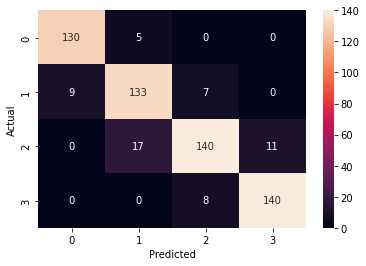

In [64]:
sns.heatmap(confusion_matrix(y_test,y_pred), annot = True ,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### Approach 2: 10-fold cross validation.

In [65]:
from sklearn.preprocessing import StandardScaler

scaler_1 = StandardScaler()

In [66]:
## Scaling the entire feature set
X_cross = scaler_1.fit_transform(X)        ## This will be common for all models (**Approach 2**)

In [67]:
lg2 = LogisticRegression()    

In [68]:
## 10-fold cross validation
lg2_score = cross_validate(lg2 , X_cross, y , cv = 10, scoring=['r2','neg_root_mean_squared_error','neg_mean_absolute_error'],return_train_score=True)     

In [69]:
lg2_df = pd.DataFrame(lg2_score)

In [70]:
lg2_df = lg2_df.rename(columns={'test_neg_root_mean_squared_error':'Test_RMSE',
                     'train_neg_root_mean_squared_error':'Train_RMSE',
                     'test_neg_mean_absolute_error':'Test_MAE',
                     'train_neg_mean_absolute_error':'Train_MAE',
                            'test_r2':'Test_R2','train_r2':'Train_R2'})
lg2_df.drop(columns=['fit_time','score_time'],inplace=True)

In [71]:
lg2_df

,Test_R2,Train_R2,Test_RMSE,Train_RMSE,Test_MAE,Train_MAE
0,0.940,0.960889,-0.273861,-0.221108,-0.075,-0.048889
1,0.952,0.958667,-0.244949,-0.227303,-0.060,-0.051667
2,0.940,0.958222,-0.273861,-0.228522,-0.075,-0.052222
3,0.924,0.961778,-0.308221,-0.218581,-0.095,-0.047778
4,0.956,0.957778,-0.234521,-0.229734,-0.055,-0.052778
5,0.944,0.964889,-0.264575,-0.209497,-0.070,-0.043889
6,0.928,0.960889,-0.300000,-0.221108,-0.090,-0.048889
7,0.952,0.958667,-0.244949,-0.227303,-0.060,-0.051667
8,0.908,0.961778,-0.339116,-0.218581,-0.115,-0.047778
9,0.964,0.958222,-0.212132,-0.228522,-0.045,-0.052222


In [72]:
LG = lg2_df.drop(index={0,1,2,3,4,6,7,8,9})
LG.rename(index = {5:'LogisticRegression'}, inplace= True)

In [73]:
LG                                                                        ## Best score among 10-fold cross validation

,Test_R2,Train_R2,Test_RMSE,Train_RMSE,Test_MAE,Train_MAE
LogisticRegression,0.944,0.964889,-0.264575,-0.209497,-0.07,-0.043889


## Random-Forest Classifier

### Approach 1: Train-Test Split

In [74]:
from sklearn.ensemble import RandomForestClassifier          ## importing random forest classifier from sklearn

In [75]:
rfc = RandomForestClassifier(random_state = 4651152)      ## defining classifier object

In [76]:
classifier1 = rfc.fit(X_train_scaled,y_train)             ## fitting scaled data to classifier

In [77]:
y_pred_rfc = rfc.predict(X_test_scaled)                       ## Test score prediction
y_pred_train_rfc = rfc.predict(X_train_scaled)                 ## Training score prediction

In [78]:
train_score_rfc = accuracy_score(y_train , y_pred_train_rfc)   ## Train score
train_score_rfc

1.0

In [79]:
print(accuracy_score(y_test,y_pred_rfc))                       ## Test score

0.845


In [80]:
print(classification_report(y_train, y_pred_train_rfc))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       365
           1       1.00      1.00      1.00       351
           2       1.00      1.00      1.00       332
           3       1.00      1.00      1.00       352

    accuracy                           1.00      1400
   macro avg       1.00      1.00      1.00      1400
weighted avg       1.00      1.00      1.00      1400



In [81]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95       135
           1       0.86      0.89      0.88       149
           2       0.90      0.83      0.87       168
           3       0.93      0.95      0.94       148

    accuracy                           0.91       600
   macro avg       0.91      0.91      0.91       600
weighted avg       0.91      0.91      0.90       600



In [82]:
y_test.value_counts()

2    168
1    149
3    148
0    135
Name: price_range, dtype: int64

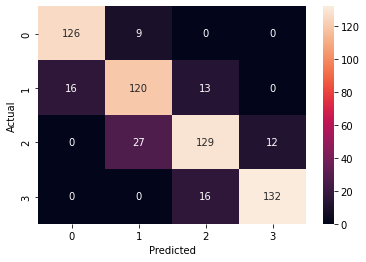

In [83]:
sns.heatmap(confusion_matrix(y_test,y_pred_rfc), annot = True ,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### Approach 2: 10-fold cross validation

In [84]:
rfc2 = RandomForestClassifier()      ## Preparing base model for cross validation

In [85]:
## 10-fold cross validation
rfc2_score = cross_validate(rfc2 , X_cross, y , cv = 10, scoring=['r2','neg_root_mean_squared_error','neg_mean_absolute_error'],return_train_score=True)     

In [86]:
df_rfc2 = pd.DataFrame(rfc2_score)

In [87]:
df_rfc2 = df_rfc2.rename(columns={'test_neg_root_mean_squared_error':'Test_RMSE',
                     'train_neg_root_mean_squared_error':'Train_RMSE',
                     'test_neg_mean_absolute_error':'Test_MAE',
                     'train_neg_mean_absolute_error':'Train_MAE',
                            'test_r2':'Test_R2','train_r2':'Train_R2'})
df_rfc2.drop(columns=['fit_time','score_time'],inplace=True)

In [88]:
df_rfc2

,Test_R2,Train_R2,Test_RMSE,Train_RMSE,Test_MAE,Train_MAE
0,0.872,1.0,-0.400000,-0.0,-0.160,-0.0
1,0.880,1.0,-0.387298,-0.0,-0.150,-0.0
2,0.880,1.0,-0.387298,-0.0,-0.150,-0.0
3,0.888,1.0,-0.374166,-0.0,-0.140,-0.0
4,0.888,1.0,-0.374166,-0.0,-0.140,-0.0
5,0.896,1.0,-0.360555,-0.0,-0.130,-0.0
6,0.876,1.0,-0.393700,-0.0,-0.155,-0.0
7,0.880,1.0,-0.387298,-0.0,-0.150,-0.0
8,0.872,1.0,-0.400000,-0.0,-0.160,-0.0
9,0.900,1.0,-0.353553,-0.0,-0.125,-0.0


## KNN Classifier

### Approach 1: Train-Test Split

In [89]:
from sklearn.neighbors import KNeighborsClassifier

In [90]:
knn_clf = KNeighborsClassifier()

In [91]:
classifier2 = knn_clf.fit(X_train_scaled, y_train)

In [92]:
y_pred_knn = knn_clf.predict(X_test_scaled)                       ## Test score prediction
y_pred_train_knn = knn_clf.predict(X_train_scaled)                 ## Training score prediction

In [93]:
accuracy_score(y_train , y_pred_train_knn)   ## Train score

0.6221428571428571

In [94]:
accuracy_score(y_test , y_pred_knn)       ## Test score

0.38

In [95]:
print(classification_report(y_train, y_pred_train_knn))     ## Classification report of train set

              precision    recall  f1-score   support

           0       0.65      0.77      0.71       365
           1       0.53      0.61      0.57       351
           2       0.54      0.52      0.53       332
           3       0.84      0.57      0.68       352

    accuracy                           0.62      1400
   macro avg       0.64      0.62      0.62      1400
weighted avg       0.64      0.62      0.62      1400



In [96]:
print(classification_report(y_test, y_pred_knn))           ## Classification report of test set

              precision    recall  f1-score   support

           0       0.42      0.57      0.48       135
           1       0.26      0.31      0.28       149
           2       0.35      0.28      0.31       168
           3       0.55      0.39      0.46       148

    accuracy                           0.38       600
   macro avg       0.39      0.39      0.38       600
weighted avg       0.39      0.38      0.38       600



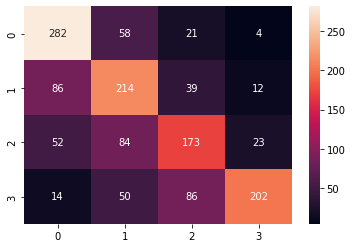

In [97]:
sns.heatmap(confusion_matrix(y_train, y_pred_train_knn), annot =True , fmt ='d')  ## Confusion matrix on train set

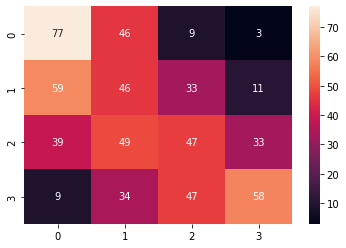

In [98]:
sns.heatmap(confusion_matrix(y_test, y_pred_knn), annot =True , fmt ='d')    ## Confusion matrix on test set

### Approach 2: 10-fold cross validation

In [99]:
knn1 = KNeighborsClassifier()   ## Preparing base model for cross validation

In [100]:
## 10-fold cross validation
knn1_score = cross_validate(knn1 , X_cross, y , cv = 10, scoring=['r2','neg_root_mean_squared_error','neg_mean_absolute_error'],return_train_score=True)    

In [101]:
df_knn = pd.DataFrame(knn1_score)

In [102]:
df_knn = df_knn.rename(columns={'test_neg_root_mean_squared_error':'Test_RMSE',
                     'train_neg_root_mean_squared_error':'Train_RMSE',
                     'test_neg_mean_absolute_error':'Test_MAE',
                     'train_neg_mean_absolute_error':'Train_MAE',
                            'test_r2':'Test_R2','train_r2':'Train_R2'})
df_knn.drop(columns=['fit_time','score_time'],inplace=True)

In [103]:
df_knn

,Test_R2,Train_R2,Test_RMSE,Train_RMSE,Test_MAE,Train_MAE
0,-0.176,0.432889,-1.212436,-0.841955,-0.840,-0.468889
1,0.112,0.405333,-1.053565,-0.862168,-0.750,-0.483333
2,-0.044,0.420889,-1.142366,-0.850817,-0.825,-0.470556
3,-0.052,0.409778,-1.146734,-0.858940,-0.835,-0.476667
4,0.148,0.400889,-1.031988,-0.865384,-0.715,-0.488889
5,0.048,0.399111,-1.090871,-0.866667,-0.790,-0.486667
6,0.064,0.432889,-1.081665,-0.841955,-0.780,-0.466667
7,-0.036,0.414222,-1.137981,-0.855700,-0.845,-0.478889
8,-0.012,0.413333,-1.124722,-0.856349,-0.795,-0.477778
9,-0.024,0.410667,-1.131371,-0.858293,-0.790,-0.483333


## From above different models implementations it can be safely concluded that -
  ### Logistic Regressor performed best & is our final model

  ### RandomForest Classifier overfitted with data

  ### Knn classifier gave poor performance


## Hyper-parameter Tuning on Final Model

In [104]:
hyp_logistic = LogisticRegression()     ## Defining base model for hyper-parameter tuning

In [105]:
params = {'C' : [100, 10, 1.0, 0.1, 0.01],                    ## Passing parameters and their values
         'max_iter': [500,1000],
         'random_state' : [0,1,10,55,99,555,999,9094,4494]}

In [106]:
grid_model = GridSearchCV(hyp_logistic, param_grid = params, scoring = 'r2', cv = 10)   ## Tuning with 10-fold cross validation

In [107]:
sc_hyp = StandardScaler()               ## Defining base standard scaler for tuning

In [108]:
X_hyp = sc_hyp.fit_transform(X_train)      ## Scaling the features

In [109]:
grid_model.fit(X_hyp, y_train)            ## Training with hyper-parmeters

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': [100, 10, 1.0, 0.1, 0.01],
                         'max_iter': [500, 1000],
                         'random_state': [0, 1, 10, 55, 99, 555, 999, 9094,
                                          4494]},
             scoring='r2')

In [110]:
grid_model.best_params_                                                     ## Getting best hyper-parameters and their values

{'C': 100, 'max_iter': 500, 'random_state': 0}

In [111]:
final_model = LogisticRegression(C=100, max_iter = 500 , random_state=0)  ## Actually implementing final model with best above parameters

In [112]:
final_clf = final_model.fit(X_train_scaled, y_train)                       ## Training the model

In [113]:
y_pred_train_final = final_model.predict(X_train_scaled)                    ## Predicting train & test scores
y_pred_test_final = final_model.predict(X_test_scaled)                      

In [114]:
accuracy_score(y_train, y_pred_train_final)                                   ## Final Train score

0.9592857142857143

In [115]:
accuracy_score(y_test, y_pred_test_final)                                     ## Final Test score

0.915

In [116]:
print(classification_report(y_train, y_pred_train_final))               ## Classification report on train set

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       365
           1       0.95      0.95      0.95       351
           2       0.94      0.93      0.94       332
           3       0.96      0.97      0.97       352

    accuracy                           0.96      1400
   macro avg       0.96      0.96      0.96      1400
weighted avg       0.96      0.96      0.96      1400



In [117]:
print(classification_report(y_test, y_pred_test_final))              ## Clsssification report on test set

              precision    recall  f1-score   support

           0       0.95      0.96      0.95       135
           1       0.88      0.89      0.88       149
           2       0.89      0.88      0.89       168
           3       0.95      0.94      0.95       148

    accuracy                           0.92       600
   macro avg       0.92      0.92      0.92       600
weighted avg       0.92      0.92      0.92       600



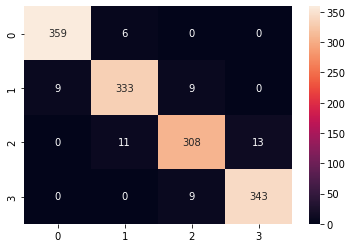

In [118]:
sns.heatmap(confusion_matrix(y_train, y_pred_train_final), annot =True , fmt ='d')   ## Confusion matrix on training set

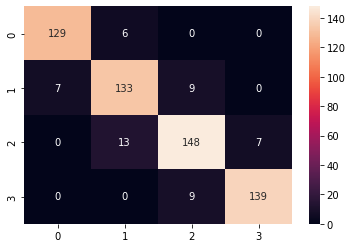

In [119]:
sns.heatmap(confusion_matrix(y_test, y_pred_test_final), annot =True , fmt ='d')   ## Confusion matrix on test set

# *Final Conclusion* : Hyper-Parameter tuning [with 10-fold cross validation] further incresed the performance of LogisticRegression on both training score and test score. 